In [8]:

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('/Users/someone./Documents/Github/github.com/Som3sh/Python/Paper/Data/revenue_data.csv', parse_dates=['Date'], index_col='Date')




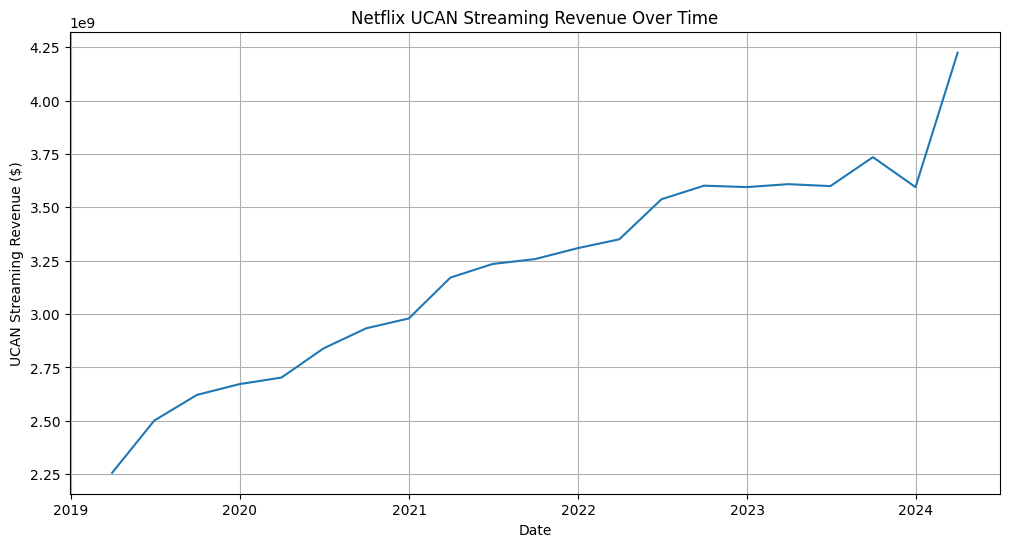

In [4]:
# Sort the index to ensure chronological order
df = df.sort_index()

# Plot UCAN Streaming Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['UCAN Streaming Revenue'])
plt.title('Netflix UCAN Streaming Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('UCAN Streaming Revenue ($)')
plt.grid(True)
plt.show()

In [5]:

# Prepare data for ARIMA model
revenue_data = df['UCAN Streaming Revenue']

# Fit ARIMA model
model = ARIMA(revenue_data, order=(1,1,1))
results = model.fit()

# Generate predictions for the next 8 quarters
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), periods=8, freq='Q')
future_predictions = results.forecast(steps=8)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({'Predicted Revenue': future_predictions}, index=future_dates)


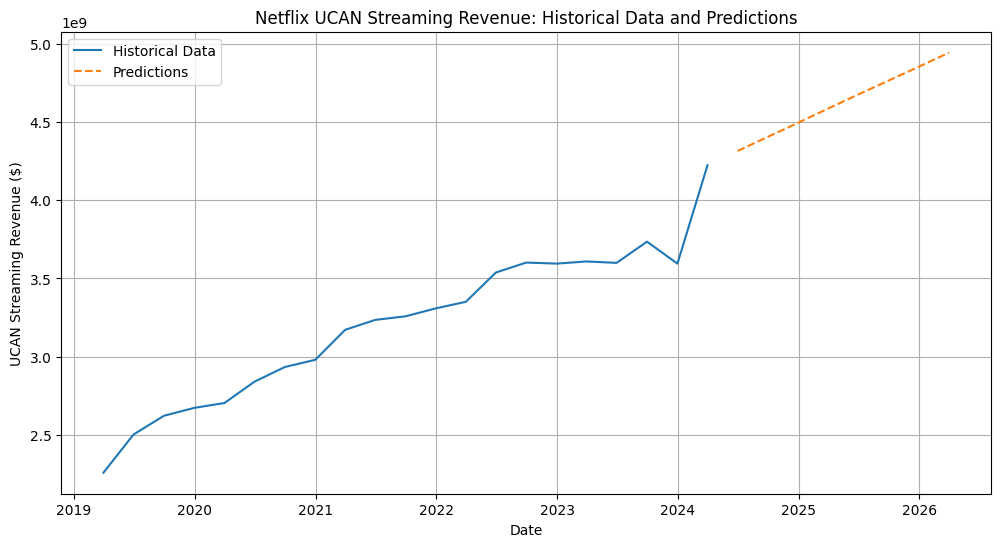

In [6]:
# Visualize historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['UCAN Streaming Revenue'], label='Historical Data')
plt.plot(future_df.index, future_df['Predicted Revenue'], label='Predictions', linestyle='--')
plt.title('Netflix UCAN Streaming Revenue: Historical Data and Predictions')
plt.xlabel('Date')
plt.ylabel('UCAN Streaming Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:

# Print predictions
print("Predicted UCAN Streaming Revenue for the next 8 quarters:")
print(future_df)

# Calculate percentage change from last actual revenue
last_actual_revenue = df['UCAN Streaming Revenue'].iloc[-1]
future_df['Percentage Change'] = (future_df['Predicted Revenue'] - last_actual_revenue) / last_actual_revenue * 100

print("\nPredictions with percentage change from last actual revenue:")
print(future_df)

Predicted UCAN Streaming Revenue for the next 8 quarters:
            Predicted Revenue
2024-06-30       4.315551e+09
2024-09-30       4.406423e+09
2024-12-31       4.496932e+09
2025-03-31       4.587079e+09
2025-06-30       4.676867e+09
2025-09-30       4.766296e+09
2025-12-31       4.855368e+09
2026-03-31       4.944084e+09

Predictions with percentage change from last actual revenue:
            Predicted Revenue  Percentage Change
2024-06-30       4.315551e+09           2.159783
2024-09-30       4.406423e+09           4.310943
2024-12-31       4.496932e+09           6.453513
2025-03-31       4.587079e+09           8.587527
2025-06-30       4.676867e+09          10.713021
2025-09-30       4.766296e+09          12.830028
2025-12-31       4.855368e+09          14.938582
2026-03-31       4.944084e+09          17.038717
